In [1]:
import pandas as pd

# Specify the CSV file path
csv_file = 'Phishing_Legitimate_full.csv'

# Import the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
print(df.head())


   id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                  0         0            0              0  ...   
1                  0         0            0              2  ...   
2                  0         0            0              0  ...   
3                  0         0            0              0  ...   
4                  0         0            0              0  ...   

   IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0              0             0                 1                 1   
1              0             0                 0                 1

Matplotlib is building the font cache; this may take a moment.


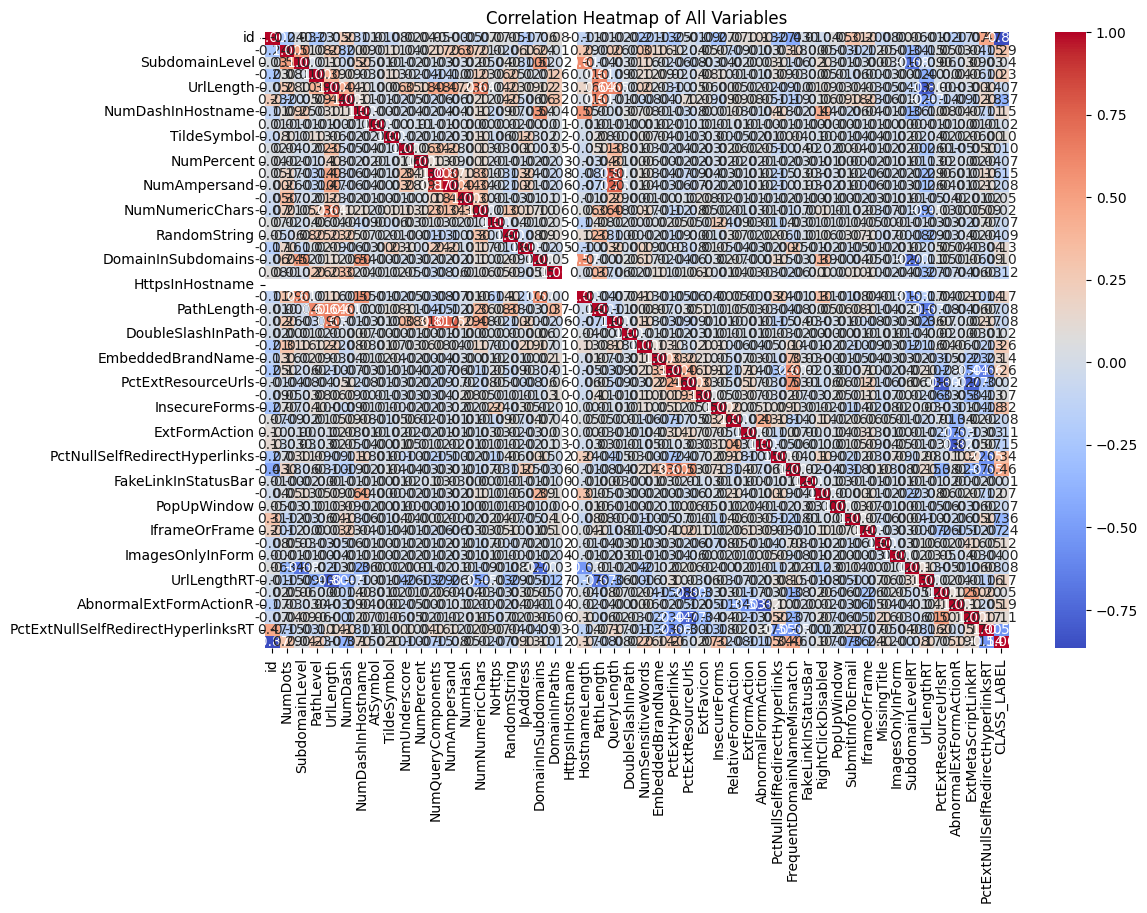

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the CSV file path
csv_file = 'Phishing_Legitimate_full.csv'

# Import the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title
plt.title('Correlation Heatmap of All Variables')

# Display the heatmap
plt.show()


In [6]:
import pandas as pd

# Specify the CSV file path
csv_file = 'Phishing_Legitimate_full.csv'

# Import the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Convert the correlation matrix into a list of pairs
corr_pairs = correlation_matrix.unstack()

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sort the correlation pairs by absolute correlation value, highest first
sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)

pd.set_option('display.max_rows', None)

# Display the sorted list of correlations
print(sorted_corr_pairs)


NumAmpersand                        NumQueryComponents                    0.872951
NumQueryComponents                  NumAmpersand                          0.872951
id                                  CLASS_LABEL                           0.866025
CLASS_LABEL                         id                                    0.866025
AbnormalExtFormActionR              AbnormalFormAction                    0.818794
AbnormalFormAction                  AbnormalExtFormActionR                0.818794
QueryLength                         NumQueryComponents                    0.811784
NumQueryComponents                  QueryLength                           0.811784
PctExtResourceUrlsRT                PctExtResourceUrls                    0.804744
PctExtResourceUrls                  PctExtResourceUrlsRT                  0.804744
UrlLengthRT                         UrlLength                             0.800096
UrlLength                           UrlLengthRT                           0.800096
PctE

In [2]:
import pandas as pd

# Load the dataset
csv_file = 'Phishing_Legitimate_full.csv'
df = pd.read_csv(csv_file)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of each feature with the target variable (CLASS_LABEL)
class_label_corr = correlation_matrix['CLASS_LABEL'].drop('CLASS_LABEL').sort_values(ascending=False)


pd.set_option('display.max_rows', None)
# Display the sorted correlations
print("Correlation of each variable with CLASS_LABEL:")
print(class_label_corr)


Correlation of each variable with CLASS_LABEL:
FrequentDomainNameMismatch            0.463956
PctNullSelfRedirectHyperlinks         0.342806
InsecureForms                         0.316380
NumDots                               0.294111
PctExtHyperlinks                      0.259728
NumSensitiveWords                     0.255208
PathLevel                             0.229450
AbnormalExtFormActionR                0.185799
UrlLengthRT                           0.169513
HostnameLength                        0.169157
NumDashInHostname                     0.150444
EmbeddedBrandName                     0.141790
IpAddress                             0.132291
MissingTitle                          0.116693
ExtMetaScriptLinkRT                   0.111150
DomainInSubdomains                    0.100452
TildeSymbol                           0.095864
RightClickDisabled                    0.074900
ExtFavicon                            0.069140
PctExtResourceUrlsRT                  0.052089
NumHash      

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/Users/colinpennington/Gradschool/Cyber Security II/HW1 CODE/Classifier/Phishing_Legitimate_full.csv'
df = pd.read_csv(file_path)

# Drop the 'id' column as it's not useful for prediction
#df = df.drop(columns=['id','TildeSymbol','RightClickDisabled','NumNumericChars'], axis=1)
'''
df = df.drop(columns=[
    'id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
    'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent',
    'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps',
    'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
    'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords',
    'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
    'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks',
    'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
    'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT',
    'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
    'PctExtNullSelfRedirectHyperlinksRT'
], axis=1)
'''

df = df.drop(columns=[
    'id',  
    'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent',
    'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps',
    'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
    'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 
    'EmbeddedBrandName',  'PctExtResourceUrls', 'ExtFavicon', 
    'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
     'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
      'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT',
    'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT'
    
], axis=1)


# Separate the features and the target variable
X = df.drop('CLASS_LABEL', axis=1)  # Features
y = df['CLASS_LABEL']               # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 95.37%


In [89]:
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression Classifier
clfLOG = LogisticRegression(random_state=42, max_iter=2000)  # Increase max_iter if needed

# Train the logistic regression model on the training data
clfLOG.fit(X_train, y_train)

# Predict on the test data
y_pred = clfLOG.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 90.90%


In [96]:
from sklearn.neural_network import MLPClassifier

# Initialize the Neural Network Classifier
clfFFNN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the neural network on the training data
clfFFNN.fit(X_train, y_train)

# Predict on the test data
y_pred = clfFFNN.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 95.07%


In [97]:
from sklearn.naive_bayes import GaussianNB


# Initialize the Naive Bayes Classifier
clfGB = GaussianNB()

# Train the Naive Bayes model on the training data
clfGB.fit(X_train, y_train)

# Predict on the test data
y_pred = clfGB.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 83.23%


In [101]:
from sklearn.ensemble import RandomForestClassifier


# Initialize the Random Forest Classifier
clfRF = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest on the training data
clfRF.fit(X_train, y_train)

# Predict on the test data
y_pred = clfRF.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 97.20%


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the part 1 and part 2 datasets
part1_path = 'Phishing_Legitimate_new_part2.csv'
part2_path = 'Phishing_Legitimate_new_part1.csv'

df_train = pd.read_csv(part1_path)  # Part 1 used for training and testing
df_score = pd.read_csv(part2_path)  # Part 2 used for scoring

# Separate the features and target variable for part 1 (training set)
X_train = df_train.drop('CLASS_LABEL', axis=1)
y_train = df_train['CLASS_LABEL']

# Separate the features and target variable for part 2 (scoring set)
X_score = df_score.drop('CLASS_LABEL', axis=1)
y_score = df_score['CLASS_LABEL']

# Initialize a Decision Tree with GridSearch for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
clf.fit(X_train, y_train)

# Best parameters found by GridSearch
print(f"Best parameters: {clf.best_params_}")

# Predict on the part 2 (scoring set)
y_pred_score = clf.predict(X_score)

# Calculate the accuracy of the model on the scoring set (part 2)
score_accuracy = accuracy_score(y_score, y_pred_score)
print(f'Accuracy on scoring dataset (part 2): {score_accuracy * 100:.2f}%')


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on scoring dataset (part 2): 96.46%


In [25]:
import pandas as pd
from sklearn.utils import shuffle

# Load the part 1 and part 2 datasets
part1_path = 'Phishing_Legitimate_part1.csv'
part2_path = 'Phishing_Legitimate_part2.csv'

df_part1 = pd.read_csv(part1_path)  # Part 1
df_part2 = pd.read_csv(part2_path)  # Part 2

# Concatenate both parts into one DataFrame
df_combined = pd.concat([df_part1, df_part2])

# Shuffle the combined DataFrame randomly
df_combined = shuffle(df_combined, random_state=42).reset_index(drop=True)

# Split the combined DataFrame back into two equal parts
half_size = len(df_combined) // 2
df_new_part1 = df_combined.iloc[:half_size]
df_new_part2 = df_combined.iloc[half_size:]

# Save the shuffled datasets back to CSV files
new_part1_path = 'Phishing_Legitimate_new_part1.csv'
new_part2_path = 'Phishing_Legitimate_new_part2.csv'

df_new_part1.to_csv(new_part1_path, index=False)
df_new_part2.to_csv(new_part2_path, index=False)

print(f"New CSVs saved as {new_part1_path} and {new_part2_path}")


New CSVs saved as Phishing_Legitimate_new_part1.csv and Phishing_Legitimate_new_part2.csv


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the part 1 and part 2 datasets
part1_path = 'Phishing_Legitimate_new_part1.csv'
part2_path = 'Phishing_Legitimate_new_part2.csv'

df_train = pd.read_csv(part1_path)  # Part 1 used for training and testing
df_score = pd.read_csv(part2_path)  # Part 2 used for scoring

# Separate the features and target variable for part 1 (training set)
X_train = df_train.drop('CLASS_LABEL', axis=1)
y_train = df_train['CLASS_LABEL']

# Separate the features and target variable for part 2 (scoring set)
X_score = df_score.drop('CLASS_LABEL', axis=1)
y_score = df_score['CLASS_LABEL']

# Initialize a Decision Tree with GridSearch for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
clf.fit(X_train, y_train)

# Best parameters found by GridSearch
print(f"Best parameters: {clf.best_params_}")

# Predict on the part 2 (scoring set)
y_pred_score = clf.predict(X_score)

# Calculate the accuracy of the model on the scoring set (part 2)
score_accuracy = accuracy_score(y_score, y_pred_score)
print(f'Accuracy on scoring dataset (part 2): {score_accuracy * 100:.2f}%')


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on scoring dataset (part 2): 96.66%
